In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\corne\AppData\Local\Temp\ipykernel_22564\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_users = pd.read_csv("data/Users.txt", sep="\t")
df_vehicles = pd.read_csv("data/Vehicles.txt", sep="\t")
df_accidents = pd.read_csv("data/Accidents.txt", sep="\t", encoding='latin1')

# Jointure sur la variable "accidentID"
df_merged1 = pd.merge(df_accidents, df_vehicles, on='AccidentId', how='inner')

df_merged1.head()
df_merged1.shape

# Fusion sur les variables "accidentId" et "vehicleId"
df_final = pd.merge(df_merged1, df_users, on=['AccidentId', 'VehicleId'], how='inner')

df_final.shape

(130169, 31)

In [3]:
df_final.head(10)

,AccidentId,Gravity_x,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,...,Category_y,Gravity_y,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
0,201800000001,NonLethal,2018-01-24,15:05:00,Daylight,590,5,No,Y-type,Normal,...,Driver,Unscathed,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1960.0
1,201800000001,NonLethal,2018-01-24,15:05:00,Daylight,590,5,No,Y-type,Normal,...,Driver,InjuredAndHospitalized,Male,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1928.0
2,201800000002,NonLethal,2018-02-12,10:15:00,Daylight,590,11,Yes,Square,VeryGood,...,Driver,Unscathed,Male,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1947.0
3,201800000002,NonLethal,2018-02-12,10:15:00,Daylight,590,11,Yes,Square,VeryGood,...,Pedestrian,MildlyInjured,Male,NaN,Helmet,NaN,OnLane<=OnSidewalk0mCrossing,Crossing,Alone,1959.0
4,201800000003,NonLethal,2018-03-04,11:35:00,Daylight,590,477,Yes,T-type,Normal,...,Driver,InjuredAndHospitalized,Male,Leisure,Helmet,Yes,NaN,NaN,Unknown,1987.0
5,201800000003,NonLethal,2018-03-04,11:35:00,Daylight,590,477,Yes,T-type,Normal,...,Driver,Unscathed,Male,NaN,ChildrenDevice,NaN,NaN,NaN,Unknown,1977.0
6,201800000004,NonLethal,2018-05-05,17:35:00,Daylight,590,52,Yes,NoIntersection,VeryGood,...,Driver,Unscathed,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1982.0
7,201800000004,NonLethal,2018-05-05,17:35:00,Daylight,590,52,Yes,NoIntersection,VeryGood,...,Driver,InjuredAndHospitalized,Male,Leisure,Helmet,NaN,NaN,NaN,Unknown,2013.0
8,201800000005,NonLethal,2018-06-26,16:05:00,Daylight,590,477,Yes,NoIntersection,Normal,...,Driver,MildlyInjured,Male,Leisure,Helmet,Yes,NaN,NaN,Unknown,2001.0
9,201800000005,NonLethal,2018-06-26,16:05:00,Daylight,590,477,Yes,NoIntersection,Normal,...,Driver,Unscathed,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1946.0


In [4]:
df_final[['Année', 'Mois', 'Jour']] = df_final['Date'].str.split('-', expand=True)
df_final['Année'] = df_final['Année'].astype(int)
df_final['Age'] = df_final['Année'] - df_final['BirthYear']
df_final.head()

,AccidentId,Gravity_x,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,...,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear,Année,Mois,Jour,Age
0,201800000001,NonLethal,2018-01-24,15:05:00,Daylight,590,5,No,Y-type,Normal,...,SeatBelt,Yes,NaN,NaN,Unknown,1960.0,2018,01,24,58.0
1,201800000001,NonLethal,2018-01-24,15:05:00,Daylight,590,5,No,Y-type,Normal,...,SeatBelt,Yes,NaN,NaN,Unknown,1928.0,2018,01,24,90.0
2,201800000002,NonLethal,2018-02-12,10:15:00,Daylight,590,11,Yes,Square,VeryGood,...,SeatBelt,Yes,NaN,NaN,Unknown,1947.0,2018,02,12,71.0
3,201800000002,NonLethal,2018-02-12,10:15:00,Daylight,590,11,Yes,Square,VeryGood,...,Helmet,NaN,OnLane<=OnSidewalk0mCrossing,Crossing,Alone,1959.0,2018,02,12,59.0
4,201800000003,NonLethal,2018-03-04,11:35:00,Daylight,590,477,Yes,T-type,Normal,...,Helmet,Yes,NaN,NaN,Unknown,1987.0,2018,03,04,31.0


In [5]:
df=df_final.drop(['Date', 'Department', 'Commune', 'PostalAddress', 'Direction', 'PassengerNumber', 
                 'Seat', 'TripReason', 'Maneuver', 'PedestrianLocation', 'PedestrianAction',
                 'PedestrianCompany', 'BirthYear', 'AccidentId', 'VehicleId', 'BirthYear', 
                  'Année', 'Mois','Jour', 'Hour', 
                 'Gravity_x', 'Category_y'], axis=1, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130169 entries, 0 to 130168
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Light             130169 non-null  object 
 1   InAgglomeration   130169 non-null  object 
 2   IntersectionType  130169 non-null  object 
 3   Weather           130160 non-null  object 
 4   CollisionType     130161 non-null  object 
 5   Category_x        130169 non-null  object 
 6   FixedObstacle     20603 non-null   object 
 7   MobileObstacle    106353 non-null  object 
 8   ImpactPoint       124066 non-null  object 
 9   Gravity_y         130169 non-null  object 
 10  Gender            130169 non-null  object 
 11  SafetyDevice      126040 non-null  object 
 12  SafetyDeviceUsed  116075 non-null  object 
 13  Age               130139 non-null  float64
dtypes: float64(1), object(13)
memory usage: 13.9+ MB


In [6]:
y = df['Gravity_y']
X = df.drop('Gravity_y', axis=1)

from collections import Counter
Counter(y)

Counter({'Unscathed': 54248,
         'MildlyInjured': 50360,
         'InjuredAndHospitalized': 22169,
         'Death': 3392})

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((104135, 13), (26034, 13))

In [8]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier

In [9]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
si = SimpleImputer(strategy='mean')

cat_pipeline = Pipeline([
    ("encoder", ohe)
])
num_pipeline = Pipeline([
    ("imputer", si)
])
preprocessor = ColumnTransformer([
    ("preprocess_categorical", cat_pipeline, selector(dtype_include=object)),
    ("preprocess_numerical", num_pipeline, selector(dtype_include=np.number))
])
model = Pipeline([
    ("preprocessing", preprocessor),
    ("oversampling", RandomOverSampler()),
    ("classifier", RandomForestClassifier())
])

In [10]:
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9230037931531185, 0.5786279480679112)

                        precision    recall  f1-score   support

                 Death       0.14      0.15      0.15       682
InjuredAndHospitalized       0.37      0.40      0.39      4452
         MildlyInjured       0.56      0.54      0.55     10025
             Unscathed       0.71      0.72      0.71     10875

              accuracy                           0.58     26034
             macro avg       0.45      0.45      0.45     26034
          weighted avg       0.58      0.58      0.58     26034



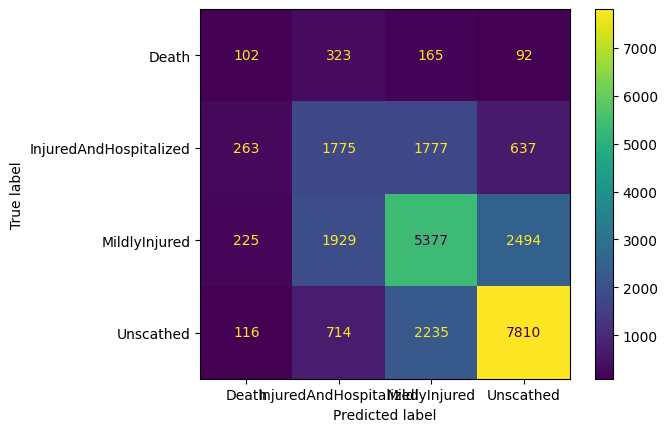

In [11]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [12]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                              pre       rec       spe        f1       geo       iba       sup

                 Death       0.14      0.15      0.98      0.15      0.38      0.13       682
InjuredAndHospitalized       0.37      0.40      0.86      0.39      0.59      0.33      4452
         MildlyInjured       0.56      0.54      0.74      0.55      0.63      0.39     10025
             Unscathed       0.71      0.72      0.79      0.71      0.75      0.56     10875

           avg / total       0.58      0.58      0.79      0.58      0.67      0.44     26034

